In [24]:
import numpy as np
import os
import cv2
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import seaborn as sns
from tensorflow.keras.applications import DenseNet121
import tensorflow as tf
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [2]:
images, labels = [], []
for i in os.listdir('raw-img'):
    for j in os.listdir(os.path.join('raw-img', i)):
        path = os.path.join('raw-img', i, j)
        img = cv2.imread(path)
        if img is None:
            print('Wrong path')
        else:
            resized_img = cv2.resize(img, (80, 80))
            images.append(resized_img)
            labels.append(i)

In [3]:
df_labels = pd.DataFrame()
df_labels['Labels'] = labels
df_labels.head()

,Labels
0,cane
1,cane
2,cane
3,cane
4,cane


In [4]:
print('Number of images in the dataset:', len(images))
print('=============================================')
print('Number of classes in the dataset:', df_labels['Labels'].nunique())
print('=============================================')
print('The classes in the dataset are:', df_labels['Labels'].unique())
print('=============================================')
print("The images' shape is:", images[0].shape) 

Number of images in the dataset: 26179
Number of classes in the dataset: 10
The classes in the dataset are: ['cane' 'cavallo' 'elefante' 'farfalla' 'gallina' 'gatto' 'mucca' 'pecora'
 'ragno' 'scoiattolo']
The images' shape is: (80, 80, 3)


In [5]:
images, labels = shuffle(images, labels)

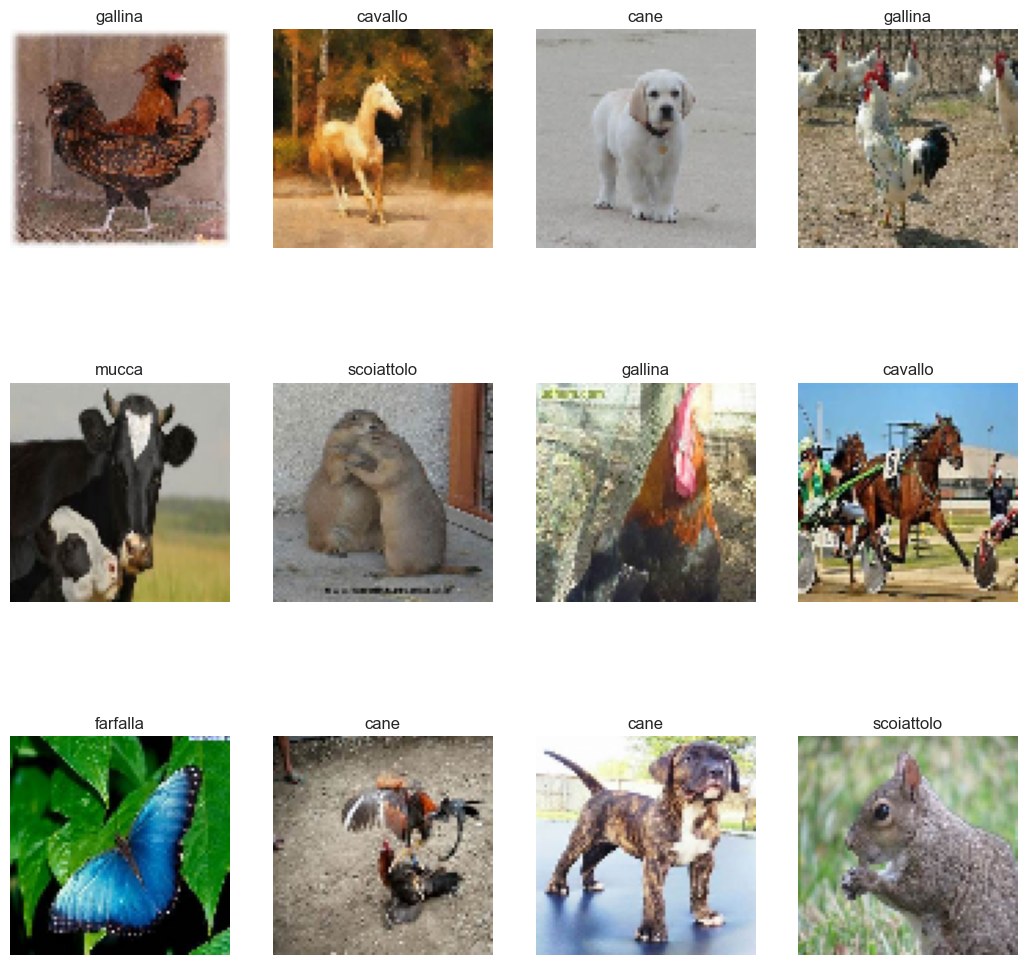

In [6]:
plt.figure(figsize = (13, 13))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    pixels = np.array(image)
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')

In [7]:
le = LabelEncoder()

In [8]:
labels_le = le.fit_transform(labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_le, test_size = 0.2, random_state = 101, stratify = labels_le)

In [10]:
print('The number of data in the training set:', len(X_train))
print('======================================================')
print('The number of data in the test set:', len(X_test))

The number of data in the training set: 20943
The number of data in the test set: 5236


In [11]:
X_train = np.array(X_train)

In [12]:
X_test = np.array(X_test)

In [13]:
X_train_scaled = X_train / 255

In [14]:
X_test_scaled = X_test / 255

In [15]:
callbacks = [
    EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min', verbose = 1)
]

In [16]:
base_model = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

In [17]:
model = Sequential()

In [18]:
model.add(base_model)
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [19]:
model.compile(
    optimizer = Adam(learning_rate = 1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [20]:
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.1, callbacks = callbacks)

Epoch 1/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 1318s 2s/step - accuracy: 0.4454 - loss: 1.7330 - val_accuracy: 0.8391 - val_loss: 0.6156
Epoch 2/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 1112s 2s/step - accuracy: 0.8360 - loss: 0.6278 - val_accuracy: 0.8616 - val_loss: 0.5131
Epoch 3/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 1160s 2s/step - accuracy: 0.9012 - loss: 0.3981 - val_accuracy: 0.8716 - val_loss: 0.4896
Epoch 4/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 1151s 2s/step - accuracy: 0.9361 - loss: 0.2755 - val_accuracy: 0.8726 - val_loss: 0.5209
Epoch 5/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 1090s 2s/step - accuracy: 0.9569 - loss: 0.2149 - val_accuracy: 0.8764 - val_loss: 0.5264
Epoch 5: early stopping


In [21]:
model.evaluate(X_test, y_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 73s 447ms/step - accuracy: 0.8810 - loss: 0.4548


[0.44338259100914, 0.8854086995124817]

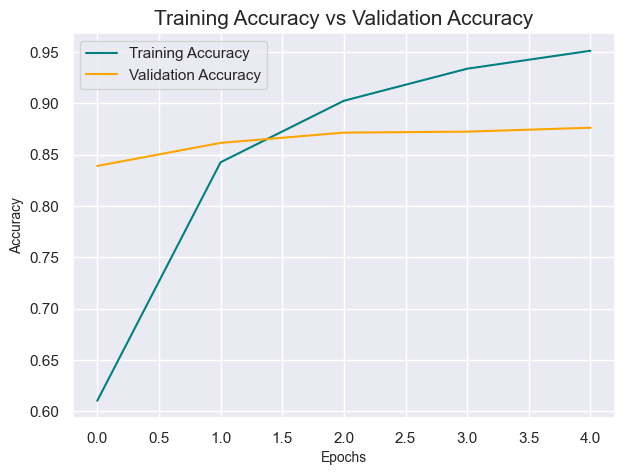

In [22]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

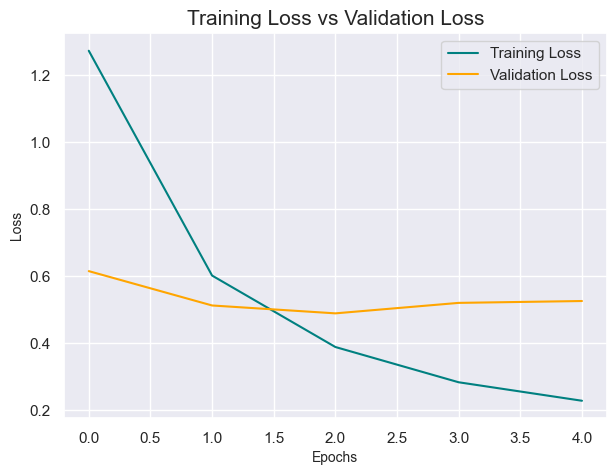

In [23]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [25]:
y_p = model.predict(X_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 81s 464ms/step


In [26]:
y_pred = [np.argmax(i) for i in y_p]

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       973
           1       0.92      0.84      0.88       525
           2       0.93      0.87      0.89       289
           3       0.89      0.94      0.92       422
           4       0.91      0.91      0.91       620
           5       0.88      0.79      0.83       334
           6       0.82      0.79      0.80       373
           7       0.81      0.80      0.80       364
           8       0.96      0.94      0.95       964
           9       0.89      0.85      0.87       372

    accuracy                           0.89      5236
   macro avg       0.88      0.87      0.87      5236
weighted avg       0.89      0.89      0.89      5236



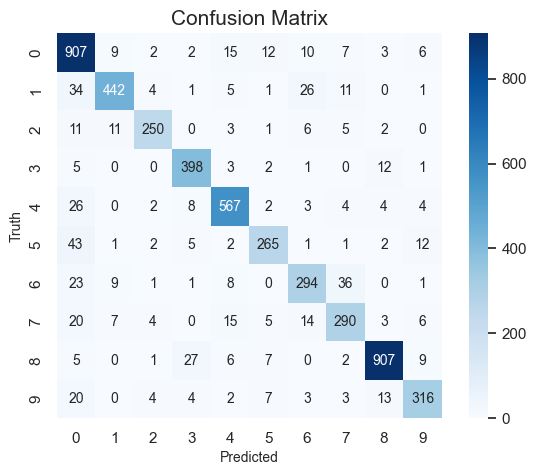

In [29]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 10}, fmt = 'd',
            cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()